In [5]:
using PyPlot
using Random

In [6]:
vc_state(l) = zeros(Bool, 2, l)

function do_check(state, i)
    l = size(state, 2)
    if state[1, i] && state[2, i] && !state[2, i+1]
        return false
    end
    if !state[1, i] && !state[2, i] && state[2, i+1]
        return false
    end
    return true
end

function update!(state, i)
    while true
        rand!(@view state[1, i:i+1])
        rand!(@view state[2, i+1:i+1])
        if do_check(state, i) && do_check(state, i+1)
            break
        end
    end
    return nothing
end

function string_state(i, j, l)
    state = zeros(Bool, 2, l)
    state[1, i] = true
    state[2, i+1:j] .= true
    return state
end


function charge_dist(state)
    l = size(state, 2)
    return state[2, 2:l] .- state[2, 1:l-1]
end
    

function sim(l, n_step, s1, s2, n_avg)
    result = zeros(2, n_step, l)
    tmp = zeros( n_step, l-1)
    for _ in 1:n_avg
        state = string_state(s1, s2, l)
        for t in 1:n_step
            result[:, t, :] .+= state
            tmp[t, :] .+= charge_dist(state)
            for i in 1:2:l-2
                update!(state, i)
            end
            for i in 2:2:l-2
                update!(state, i)
            end
        end
    end
    return result ./ n_avg
end

sim (generic function with 1 method)

In [7]:
l = 100
n_step = 40
s1 = 25
s2 = 75
n_avg = 1

mat= sim(l, n_step, s1, s2, n_avg);

In [9]:
matshow(mat[ :, :])
colorbar()

LoadError: BoundsError: attempt to access 2×40×100 Array{Float64,3} at index [1:2, 1:40]

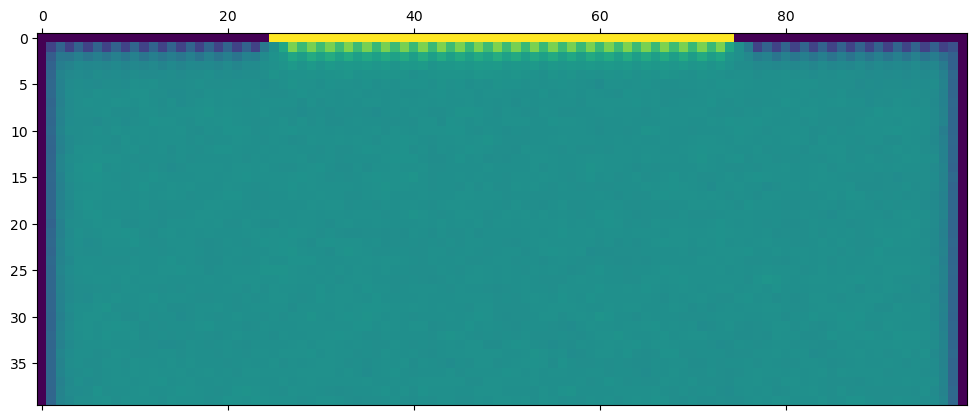

PyObject <matplotlib.image.AxesImage object at 0x000000000184B1F0>

In [79]:
matshow(mat[2, :, :])

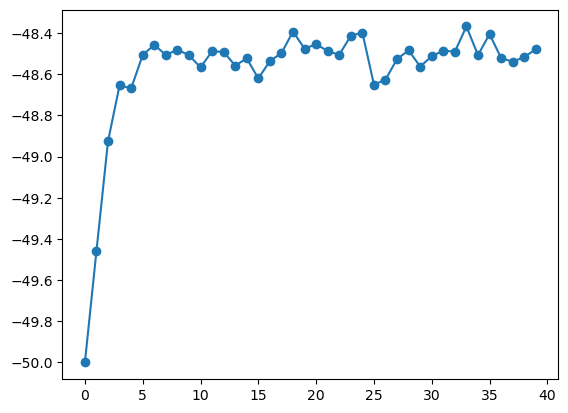

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001C21B20>

In [86]:
charges = mat[2, :, 2:end] .- mat[2, :, 1:end-1]
tmp = charges .* reshape(1:size(mat, 3)-1, 1, size(mat, 3)-1)
tmpp = sum(tmp, dims=2)

plot(tmpp, "-o")